# Visualisation des données

In [1]:
import os

import pandas as pd

In [2]:
# Répertoire du fichier de données
PROCESSED_DIR = '../data/processed/'

# Table principale
ALL_DATA_FILE = 'all_data.csv'

In [3]:
epidemie_df = (pd.read_csv(os.path.join(PROCESSED_DIR, ALL_DATA_FILE), parse_dates=['Last Update'])
               .assign(day=lambda _df: _df['Last Update'].dt.date))

In [4]:
epidemie_df.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,source,day
0,Anhui,Mainland China,2020-01-22 17:00:00,1.0,NaN,NaN,31.8257,117.2264,01-22-2020.csv,2020-01-22
1,Beijing,Mainland China,2020-01-22 17:00:00,14.0,NaN,NaN,40.1824,116.4142,01-22-2020.csv,2020-01-22
2,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,NaN,NaN,30.0572,107.8740,01-22-2020.csv,2020-01-22
3,Fujian,Mainland China,2020-01-22 17:00:00,1.0,NaN,NaN,26.0789,117.9874,01-22-2020.csv,2020-01-22
4,Gansu,Mainland China,2020-01-22 17:00:00,NaN,NaN,NaN,36.0611,103.8343,01-22-2020.csv,2020-01-22


In [7]:
epidemie_df.dtypes

Province/State            object
Country/Region            object
Last Update       datetime64[ns]
Confirmed                float64
Deaths                   float64
Recovered                float64
Latitude                 float64
Longitude                float64
source                    object
dtype: object

In [9]:
epidemie_df['Country/Region'].value_counts()

Mainland China            1358
US                         535
Australia                  177
Canada                     116
Thailand                    44
                          ... 
Ivory Coast                  1
South Africa                 1
North Ireland                1
Bosnia and Herzegovina       1
Colombia                     1
Name: Country/Region, Length: 94, dtype: int64

## Epidémie en France

In [7]:
import seaborn as sns

sns.set()

In [8]:
%matplotlib inline

In [15]:
epidemie_df[epidemie_df['Country/Region'] == 'France'].head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,source
124,NaN,France,2020-01-24 17:00:00,2.0,NaN,NaN,47.0,2.0,01-24-2020.csv
165,NaN,France,2020-01-25 17:00:00,3.0,NaN,NaN,47.0,2.0,01-25-2020.csv
211,NaN,France,2020-01-26 16:00:00,3.0,NaN,NaN,47.0,2.0,01-26-2020.csv
258,NaN,France,2020-01-27 23:59:00,3.0,NaN,NaN,47.0,2.0,01-27-2020.csv
309,NaN,France,2020-01-28 23:00:00,4.0,NaN,NaN,47.0,2.0,01-28-2020.csv


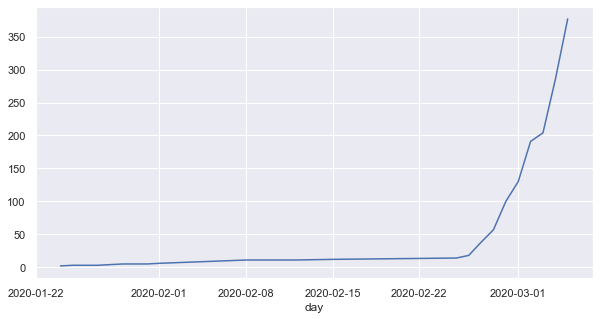

In [23]:
epidemie_df[epidemie_df['Country/Region'] == 'France'].set_index('day')['Confirmed'].plot(figsize=(10, 5));

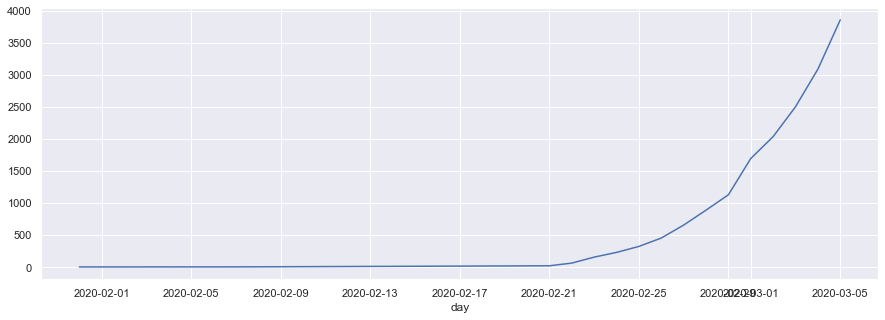

In [26]:
epidemie_df[epidemie_df['Country/Region'] == 'Italy'].set_index('day')['Confirmed'].plot(figsize=(15, 5));

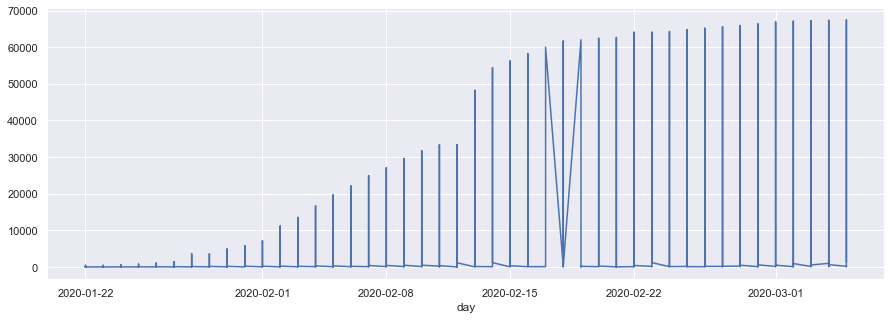

In [27]:
epidemie_df[epidemie_df['Country/Region'] == 'Mainland China'].set_index('day')['Confirmed'].plot(figsize=(15, 5));

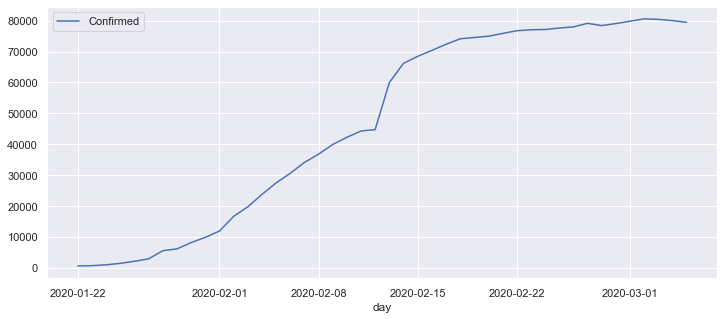

In [35]:
(epidemie_df[epidemie_df['Country/Region'] == 'Mainland China']
 .groupby('day')
 .agg({'Confirmed': 'sum'})
).plot(figsize=(12, 5));

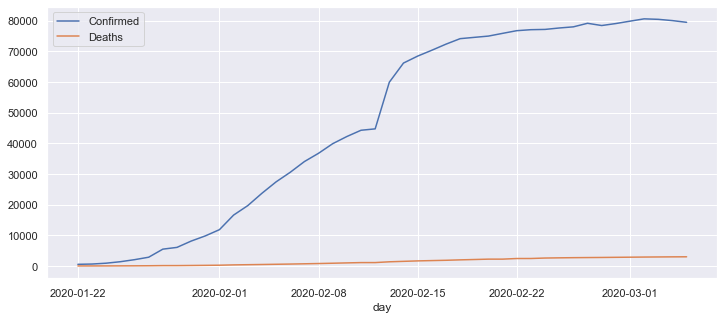

In [39]:
(epidemie_df[epidemie_df['Country/Region'] == 'Mainland China']
 .fillna(value=0)
 .groupby('day')
 .agg({'Confirmed': 'sum', 'Deaths': 'sum'})
).plot(figsize=(12, 5));

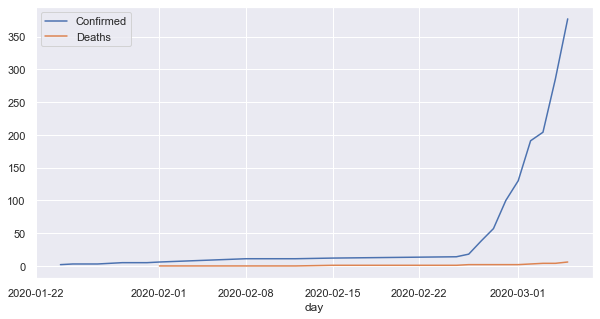

In [40]:
epidemie_df[epidemie_df['Country/Region'] == 'France'].set_index('day')[ ['Confirmed', 'Deaths'] ].plot(figsize=(10, 5));

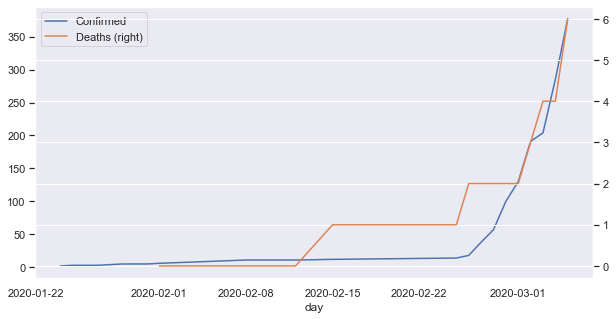

In [66]:
(epidemie_df[epidemie_df['Country/Region'] == 'France']
 .set_index('day')[ ['Confirmed', 'Deaths'] ]
 .plot(secondary_y=['Deaths'], figsize=(10, 5))
);

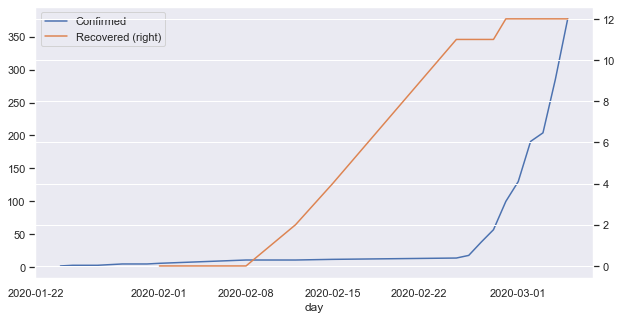

In [67]:
(epidemie_df[epidemie_df['Country/Region'] == 'France']
 .set_index('day')[ ['Confirmed', 'Recovered'] ]
 .plot(secondary_y=['Recovered'], figsize=(10, 5))
);

In [68]:
china_df = (epidemie_df[epidemie_df['Country/Region'] == 'Mainland China']
            .groupby('day')
            .agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'})
           )

In [70]:
china_df.head()

,Confirmed,Deaths,Recovered
day,,,
2020-01-22,547.0,17.0,28.0
2020-01-23,639.0,18.0,30.0
2020-01-24,916.0,26.0,36.0
2020-01-25,1399.0,42.0,39.0
2020-01-26,2062.0,56.0,49.0


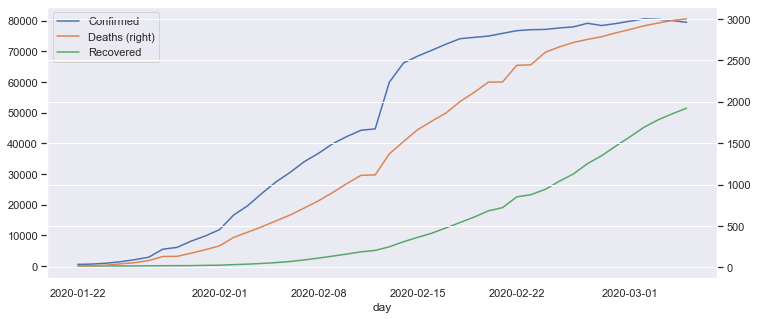

In [72]:
china_df.plot(secondary_y=['Deaths'], figsize=(12, 5));

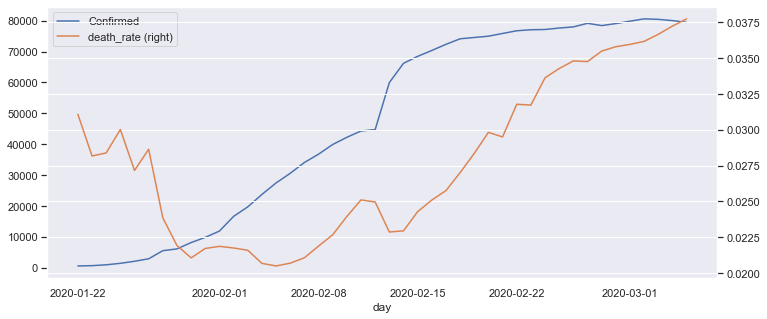

In [73]:
(china_df
 .assign(death_rate=lambda _df: _df['Deaths'] / _df['Confirmed'])
 [['Confirmed', 'death_rate']]
 .plot(secondary_y=['death_rate'], figsize=(12, 5))
);

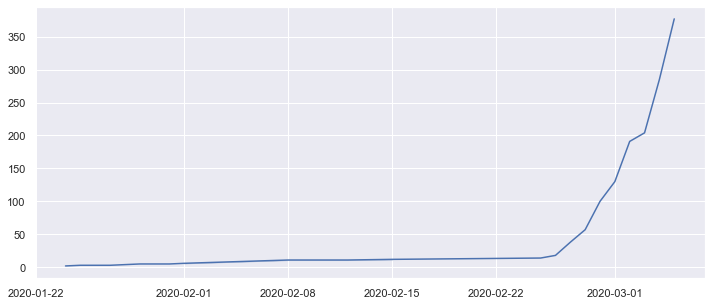

In [78]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=epidemie_df[epidemie_df['Country/Region'] == 'France'].set_index('day')['Confirmed']);

In [79]:
epidemie_df.groupby(['Country/Region', 'day']).agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'})

Confirmed  Deaths  Recovered
Country/Region day                                     
 Azerbaijan    2020-02-28        1.0     0.0        0.0
Afghanistan    2020-02-24       11.0     0.0        0.0
Algeria        2020-02-25        6.0     0.0        0.0
               2020-03-02        3.0     0.0        0.0
               2020-03-03        5.0     0.0        0.0
...                              ...     ...        ...
Vietnam        2020-02-10       14.0     0.0        1.0
               2020-02-11       30.0     0.0       12.0
               2020-02-13      128.0     0.0       56.0
               2020-02-21       64.0     0.0       56.0
               2020-02-25      160.0     0.0      160.0

[819 rows x 3 columns]

In [5]:
EUROPE = ['France', 'Germany', 'UK', 'Spain']

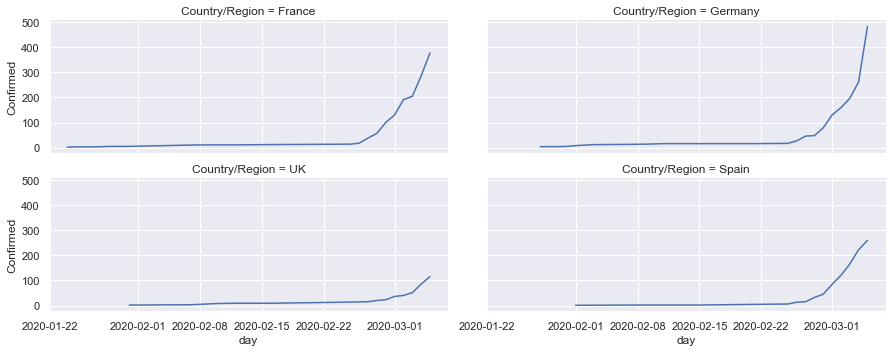

In [16]:
import matplotlib.pyplot as plt

g = sns.FacetGrid(epidemie_df[epidemie_df['Country/Region'].isin(EUROPE)],
                  col="Country/Region", col_wrap=2, height=2.5, aspect=2.5)
g = g.map(plt.plot, "day", "Confirmed");

In [17]:
import plotly.offline as py
import plotly.graph_objs as go

In [18]:
france_df = epidemie_df[epidemie_df['Country/Region'] == 'France']

In [20]:
data = [go.Scatter(x=france_df['day'],
                   y=france_df['Confirmed'],
                   name='Cas confirmés en France'
                  )]
py.iplot(data)

In [23]:
data = [go.Scatter(x=france_df['day'],
                   y=france_df['Confirmed'],
                   name='Confirmés/France'
                  ),
        go.Scatter(x=epidemie_df[epidemie_df['Country/Region'] == 'Germany']['day'],
                   y=epidemie_df[epidemie_df['Country/Region'] == 'Germany']['Confirmed'],
                   name='Confirmés/Allemagne'
                  )
       ]

layout = dict(
    title = "Epidémie Corona Virus",
    xaxis = dict(range = ['2020-01-22', '2020-03-05'])
)

fig = dict(data=data, layout=layout)
py.iplot(fig)